In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Loading the Dataset
df=pd.read_csv('StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.shape

(6607, 20)

In [ ]:
for col in df.columns:
    print(f'{col} & its unique values : {df[col].unique()} \n')

Hours_Studied & its unique values : [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44] 

Attendance & its unique values : [ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93] 

Parental_Involvement & its unique values : ['Low' 'Medium' 'High'] 

Access_to_Resources & its unique values : ['High' 'Medium' 'Low'] 

Extracurricular_Activities & its unique values : ['No' 'Yes'] 

Sleep_Hours & its unique values : [ 7  8  6 10  9  5  4] 

Previous_Scores & its unique values : [ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67] 

Motivation_Level & its unique values : ['Low' 'Medium' 'High'] 

Internet_Access & its unique values : ['Yes' 'No'] 

Tutorin

In [ ]:
df=df.dropna()
df.drop_duplicates()
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [ ]:
df.describe(include="all").columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
categorical_cols=['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender']
for col in categorical_cols:
    print(f'Value counts for {col}: \n {df[col].value_counts()}')



Value counts for Parental_Involvement: 
 Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64
Value counts for Access_to_Resources: 
 Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64
Value counts for Extracurricular_Activities: 
 Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64
Value counts for Motivation_Level: 
 Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64
Value counts for Internet_Access: 
 Internet_Access
Yes    5893
No      485
Name: count, dtype: int64
Value counts for Family_Income: 
 Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64
Value counts for Teacher_Quality: 
 Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64
Value counts for School_Type: 
 School_Type
Public     4434
Private    1944
Name: count, dtype: int64
Value counts for Peer_Influence: 
 Peer_I

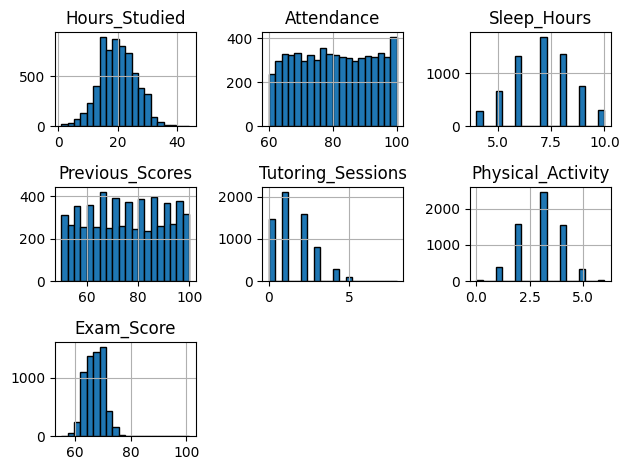

In [ ]:
df.hist(bins=20,edgecolor="black")
plt.tight_layout()
plt.show()

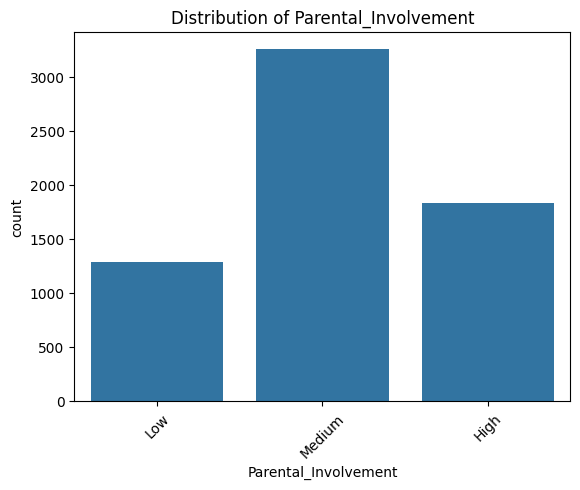

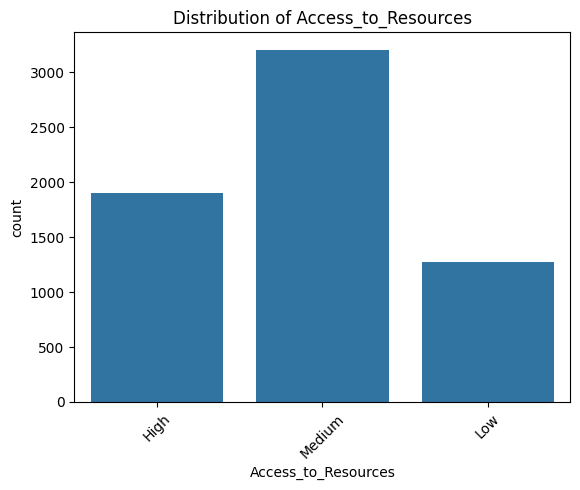

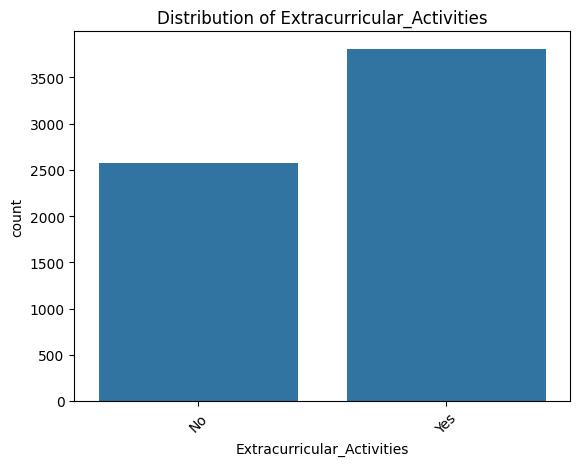

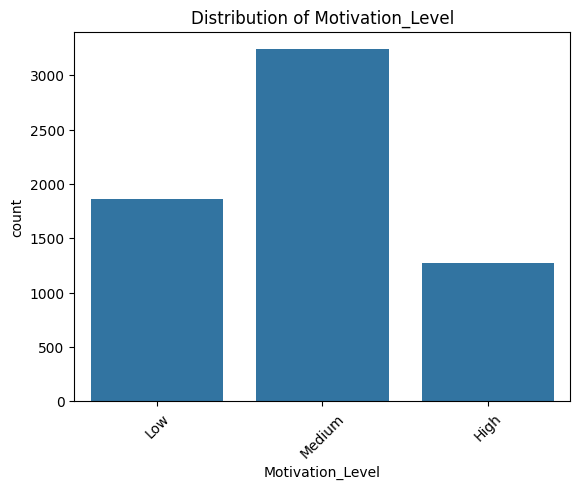

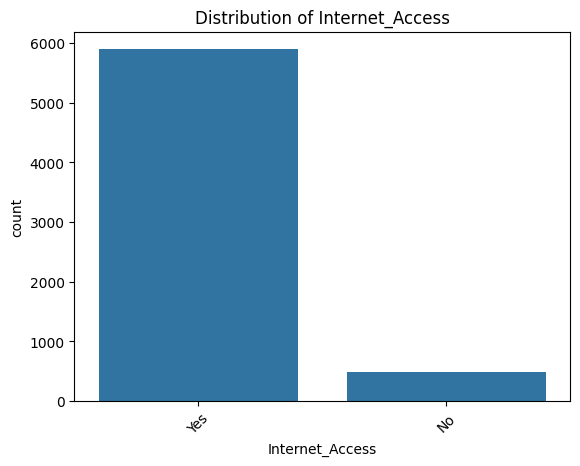

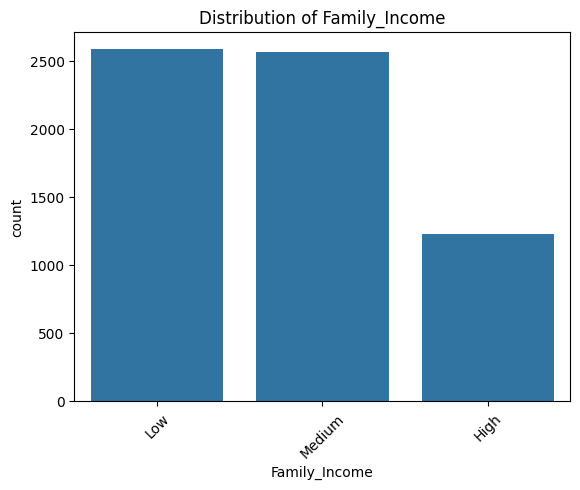

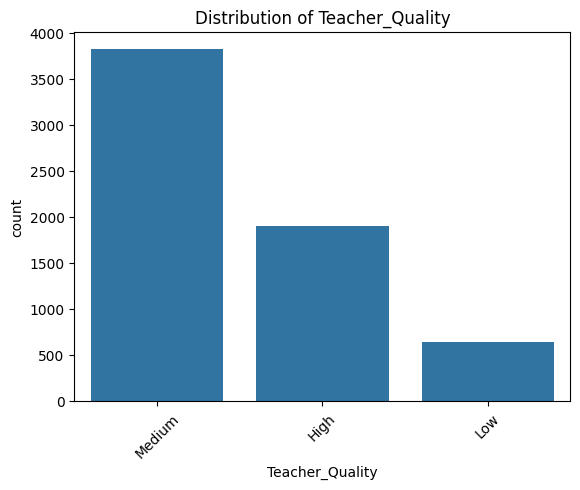

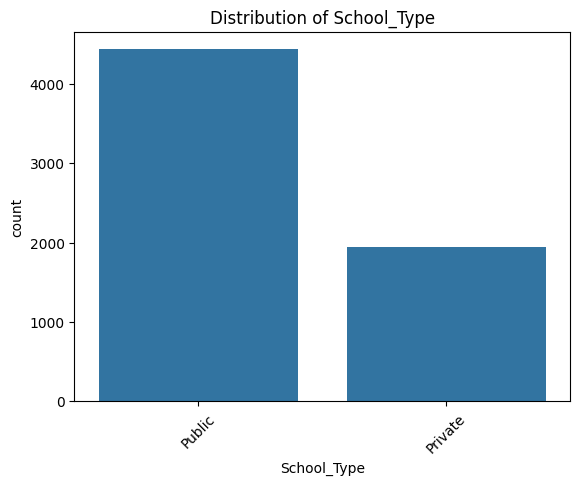

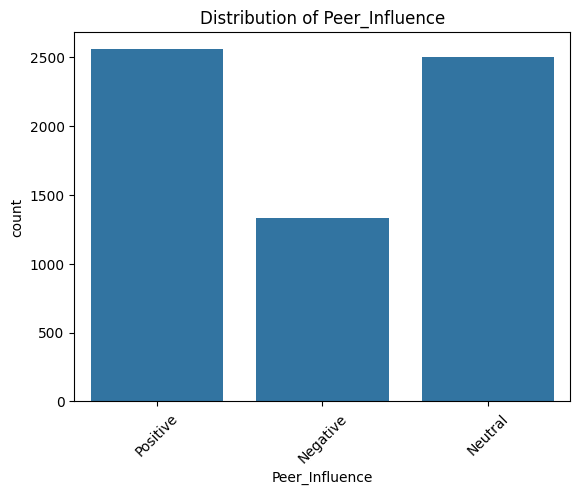

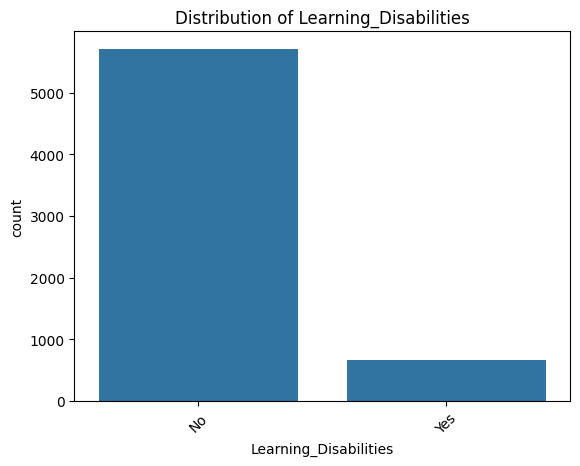

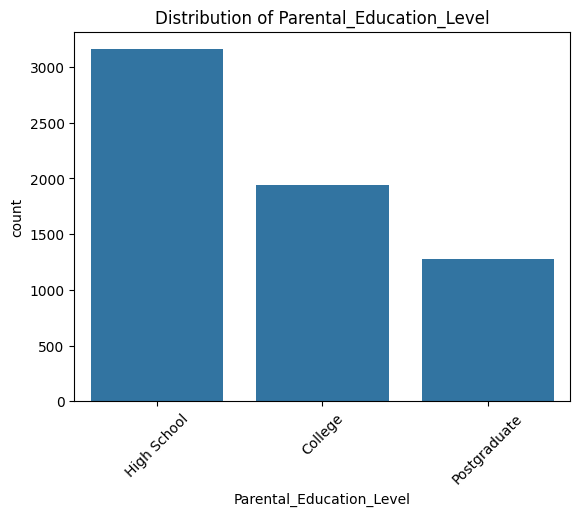

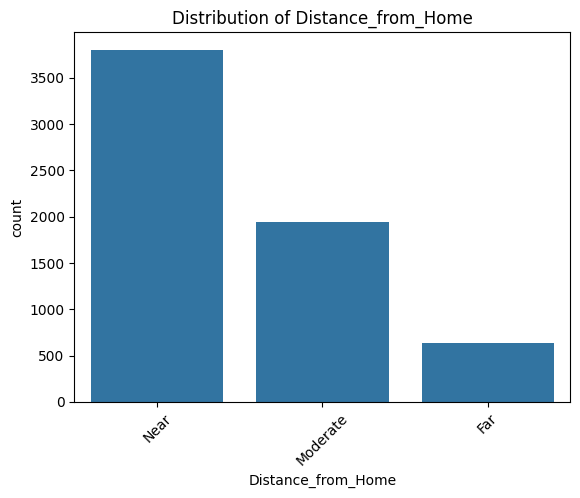

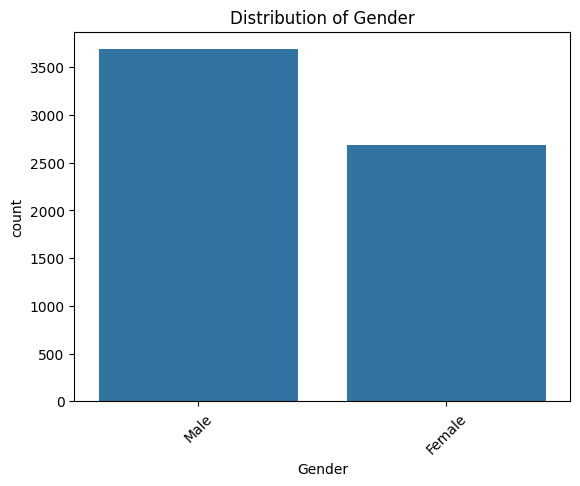

In [ ]:
for col in categorical_cols:
    sns.countplot(data=df, x = col)
    plt.title(f"Distribution of {col}")
    plt.xticks( rotation = 45)
    plt.show()

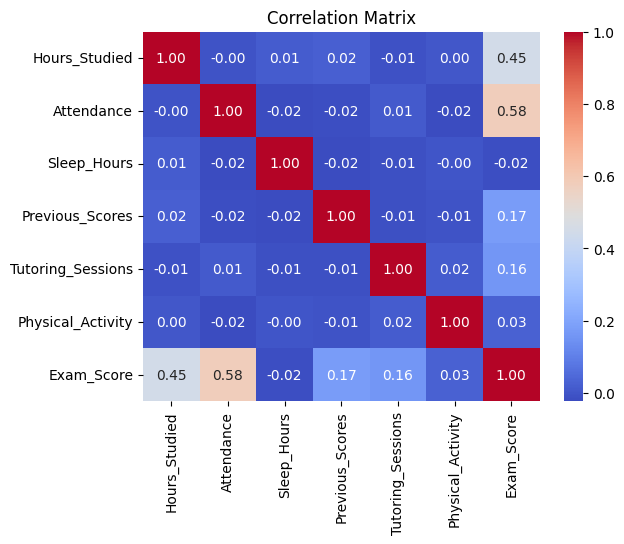

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
features=['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [ ]:
target='Exam_Score'

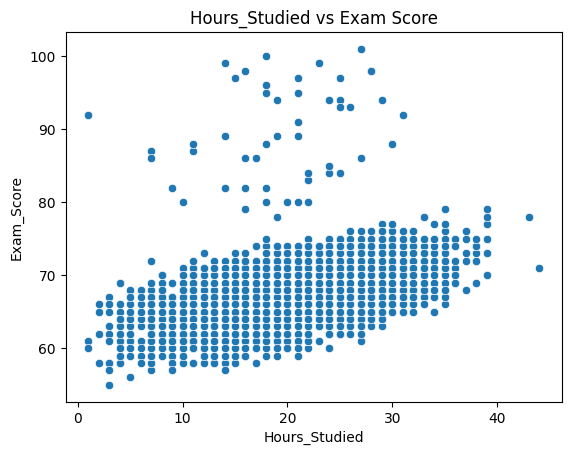

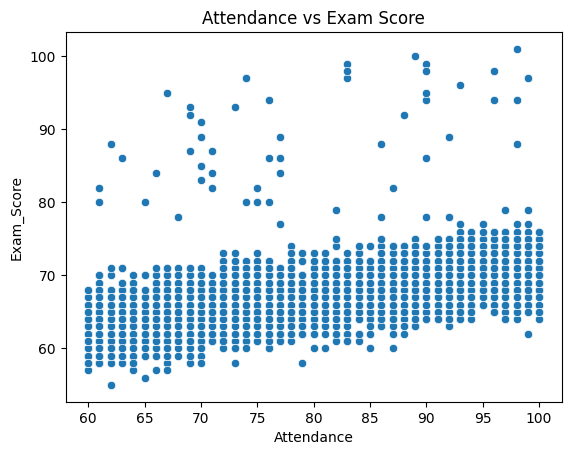

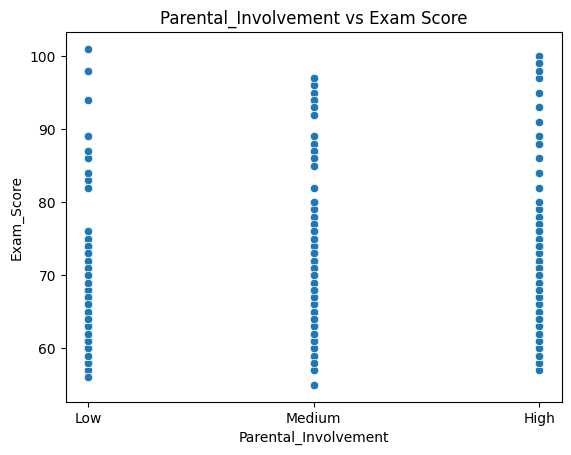

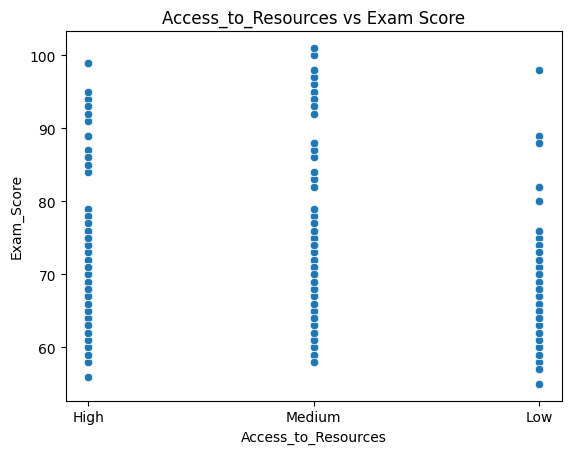

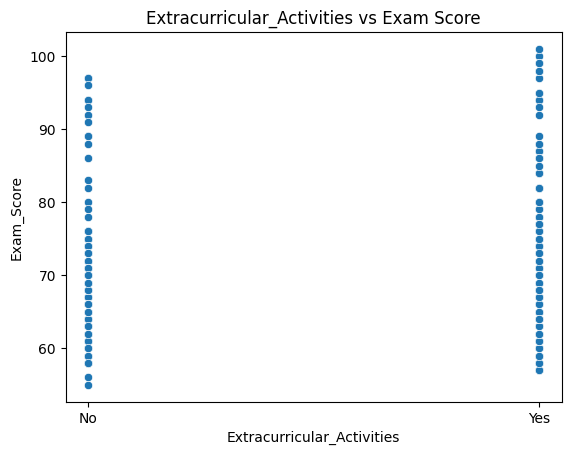

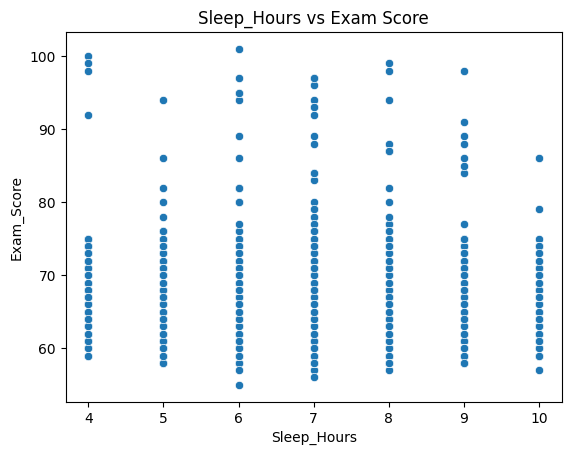

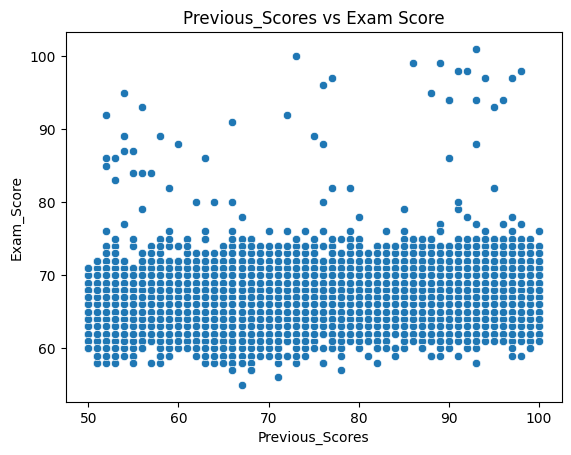

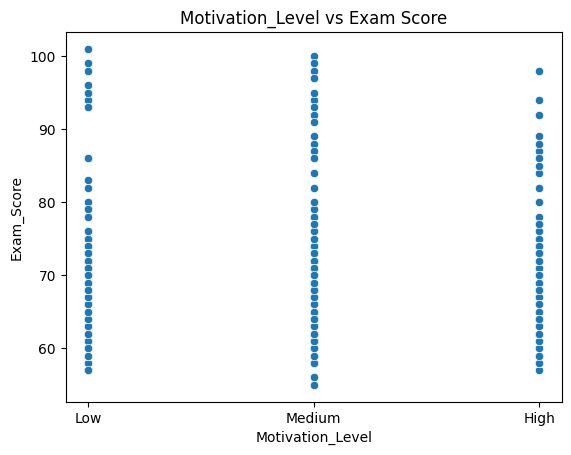

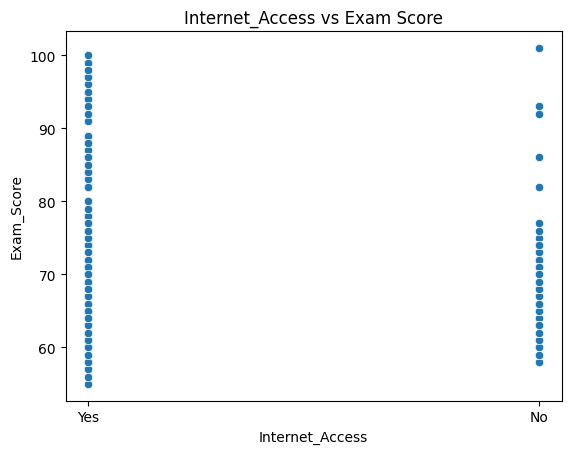

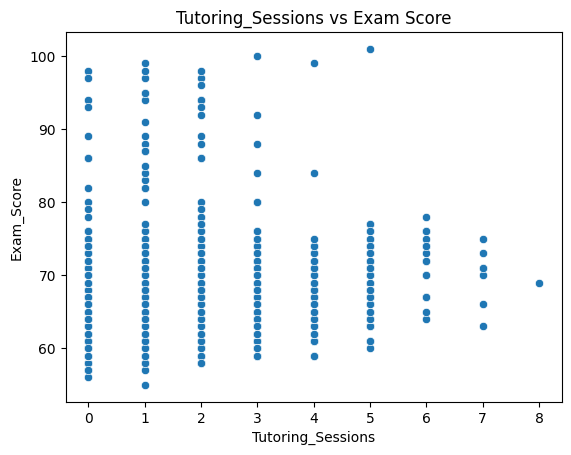

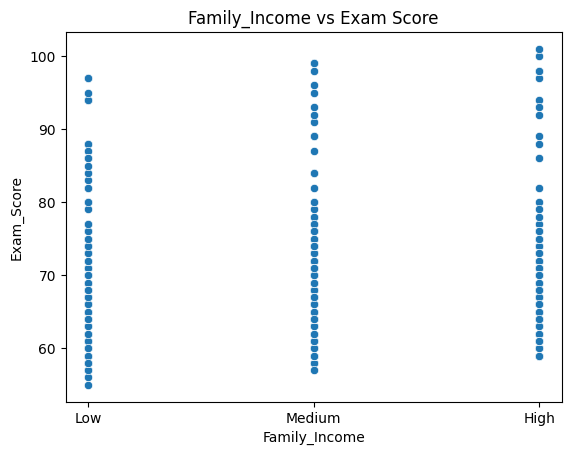

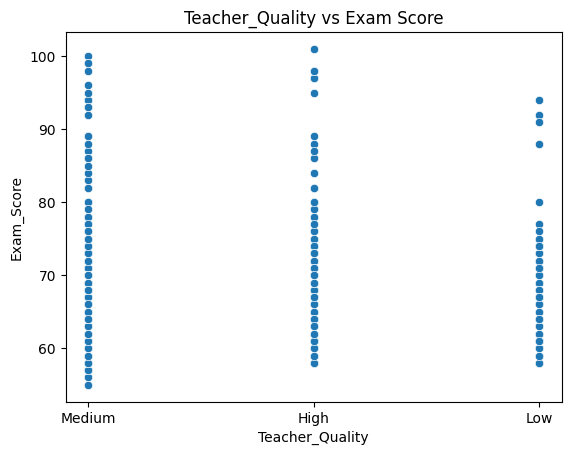

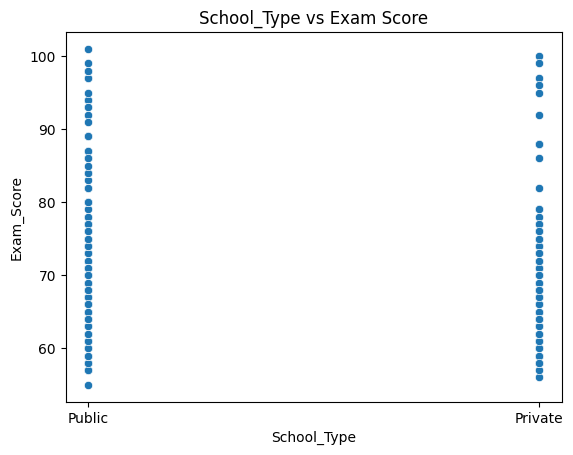

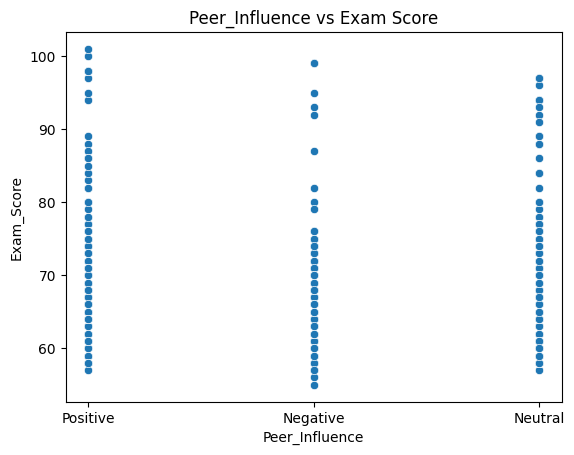

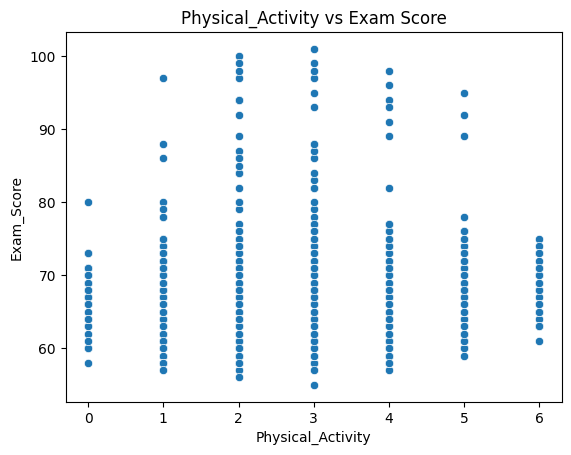

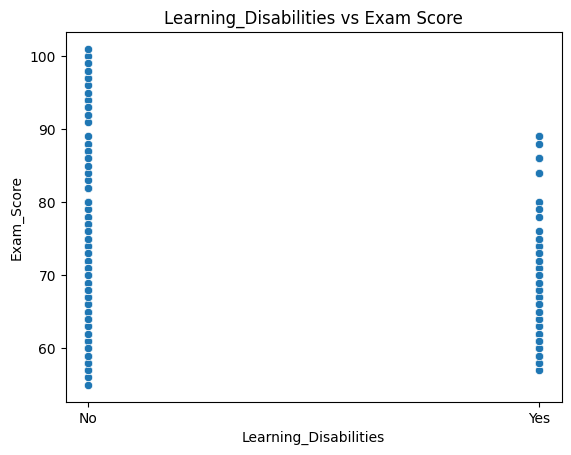

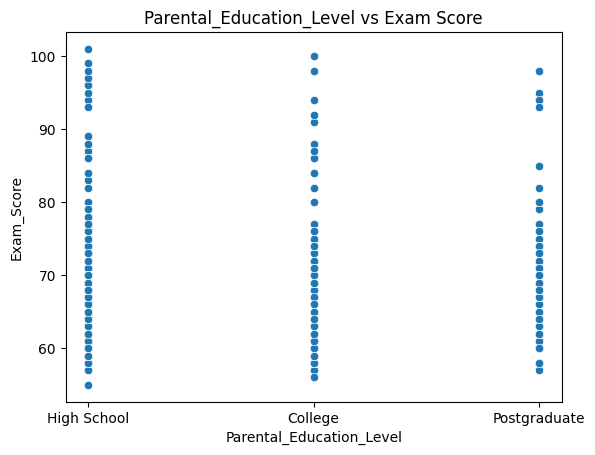

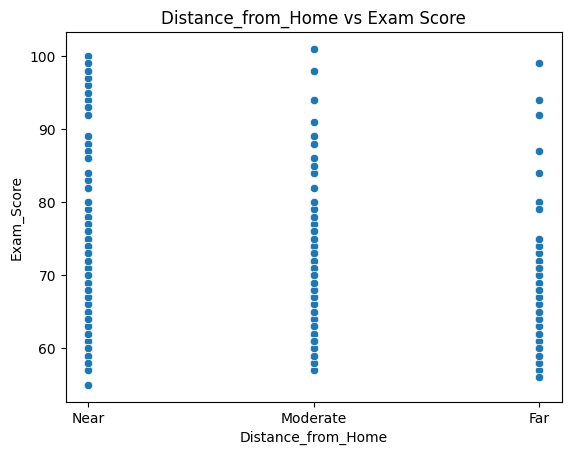

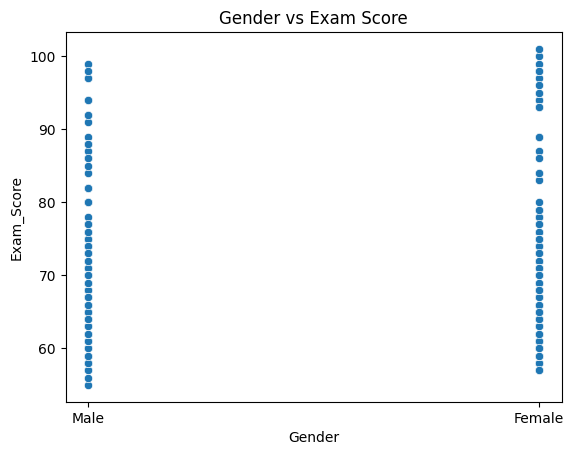

In [ ]:
for feature in features:
    sns.scatterplot(data=df,x=feature,y="Exam_Score")
    plt.title(f'{feature} vs Exam Score')
    plt.show()

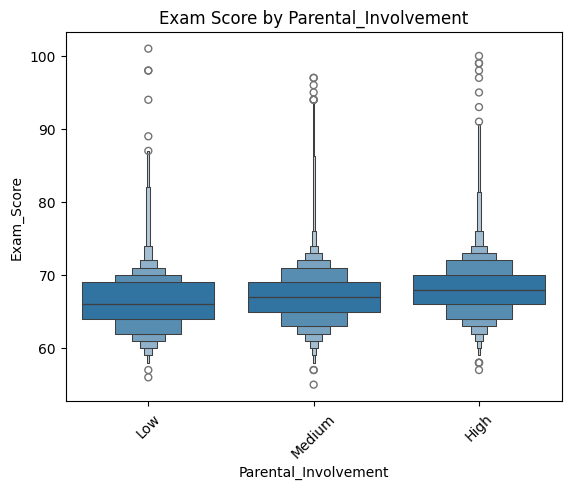

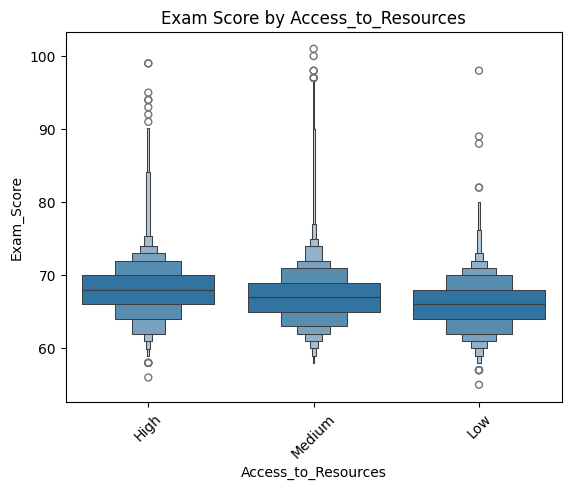

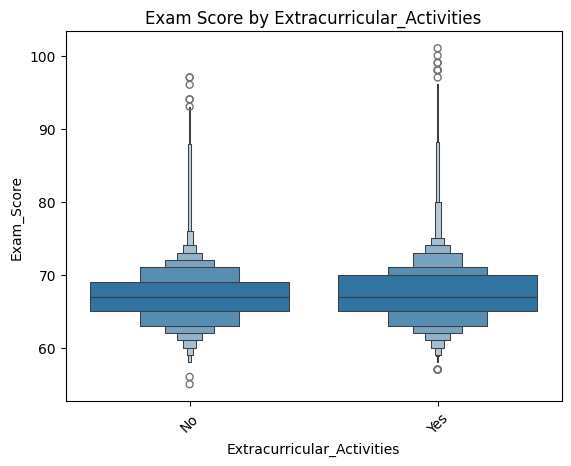

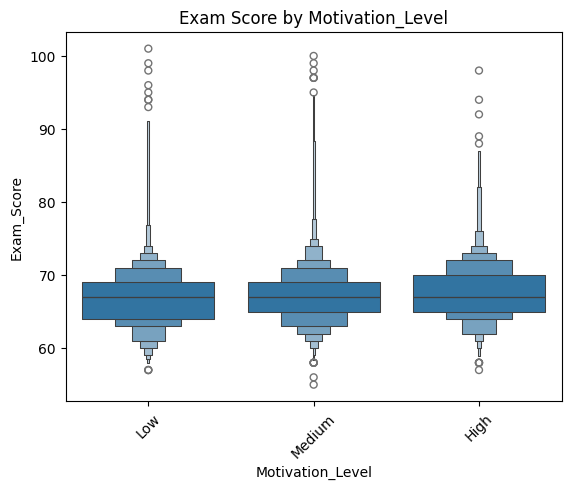

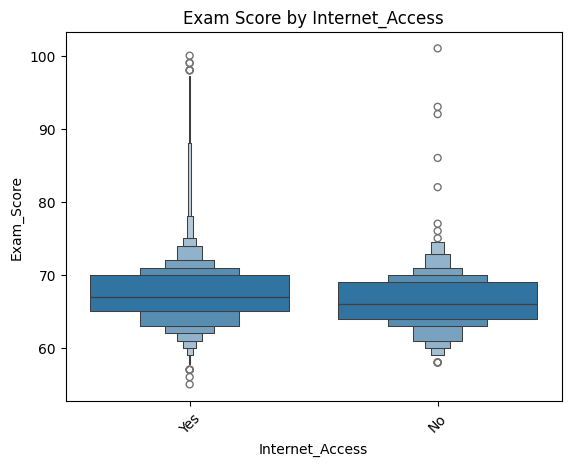

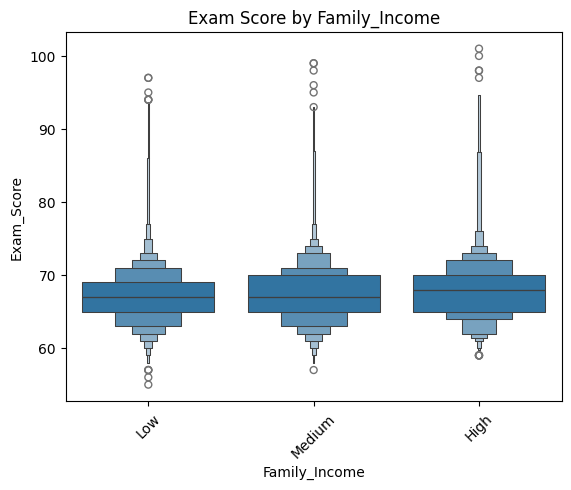

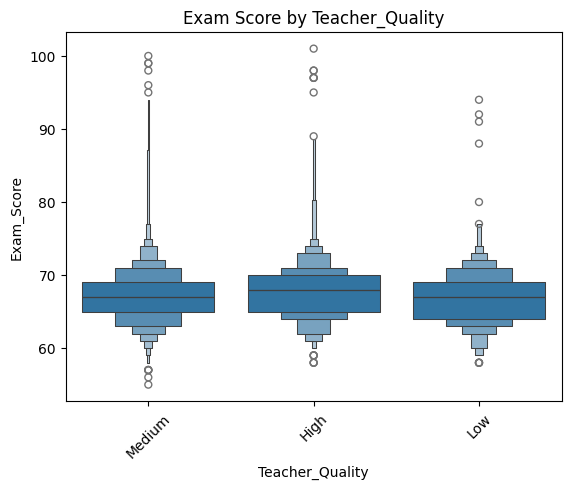

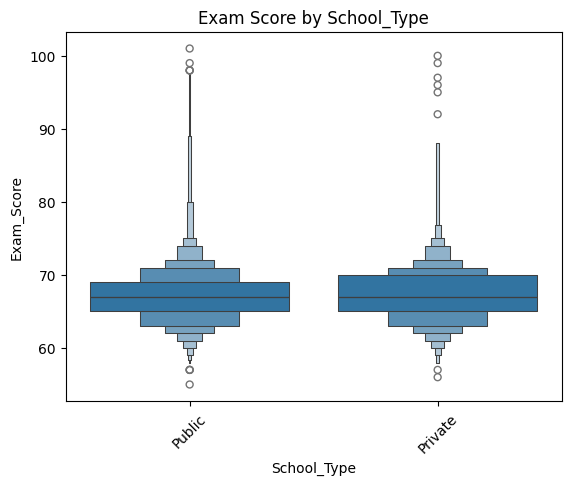

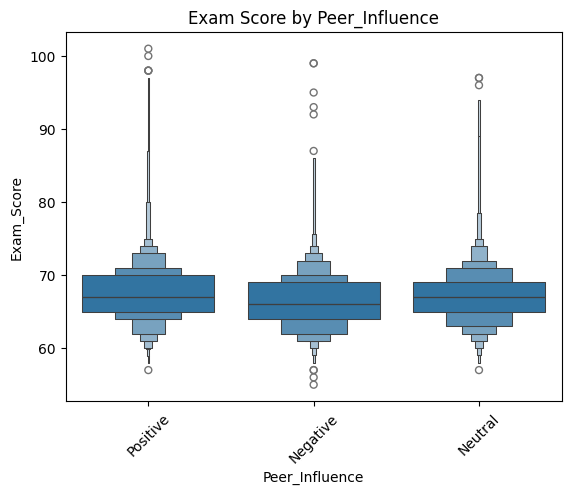

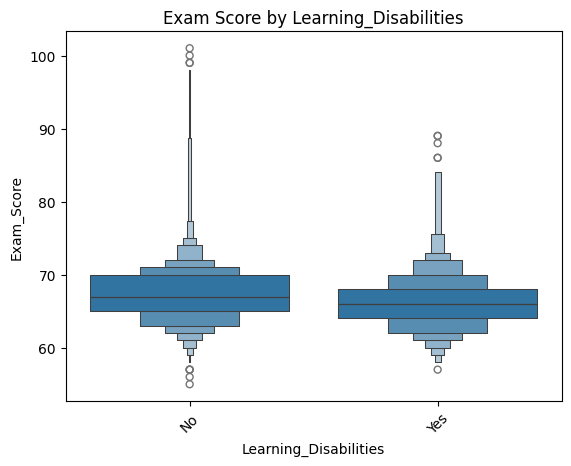

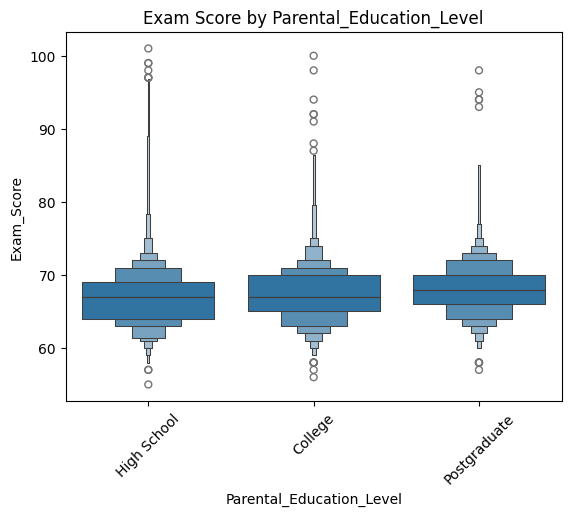

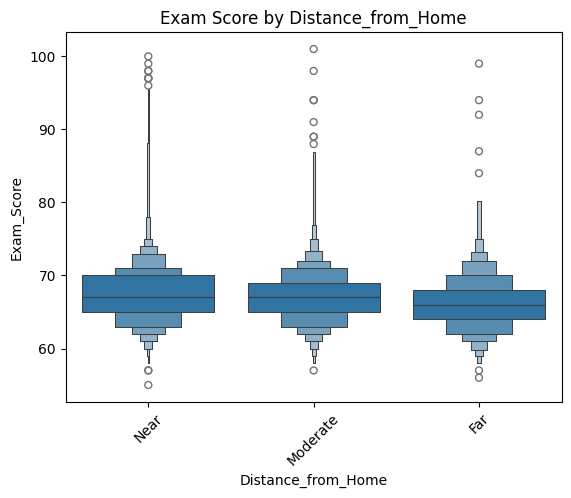

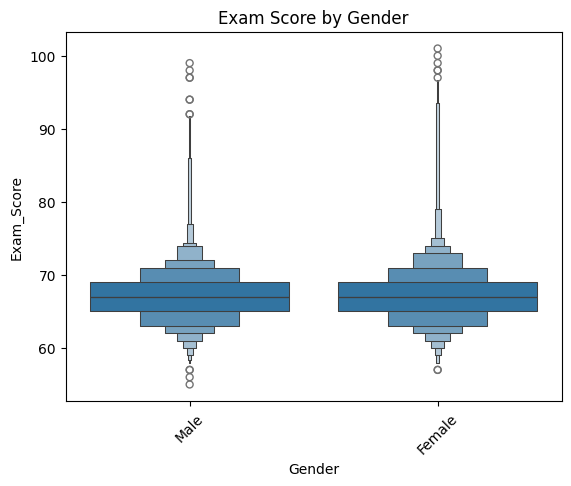

In [ ]:
for col in categorical_cols:
    sns.boxenplot(data=df,x=col,y="Exam_Score")
    plt.title(f'Exam Score by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
numerical_arr=['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
for num in numerical_arr:
    Q1 = df[num].quantile(0.25)
    Q3 = df[num].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df= df[(df[num] >= lower_bound) & (df[num] <= upper_bound)]

In [ ]:
for col in df.columns:
    print(f'{col} & its unique values : {df[col].unique()} \n')

Hours_Studied & its unique values : [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 27
 33 36 34 30  7 32  6 35  5] 

Attendance & its unique values : [ 84  64  98  89  92  88  78  94  97  83  82  68  60  70  80  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93] 

Parental_Involvement & its unique values : ['Low' 'Medium' 'High'] 

Access_to_Resources & its unique values : ['High' 'Medium' 'Low'] 

Extracurricular_Activities & its unique values : ['No' 'Yes'] 

Sleep_Hours & its unique values : [ 7  8  6 10  9  5  4] 

Previous_Scores & its unique values : [ 73  59  91  98  65  89  68  50  80  71  87  97  72  74  70  82  58  99
  84 100  75  54  90  94  51  57  66  96  93  56  52  88  63  79  81  69
  95  60  92  77  62  78  76  55  64  86  61  53  85  83  67] 

Motivation_Level & its unique values : ['Low' 'Medium' 'High'] 

Internet_Access & its unique values : ['Yes' 'No'] 

Tutoring_Sessions & its unique 

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    print(col, df[col].min(), df[col].max())

Hours_Studied 4 36
Attendance 60 100
Sleep_Hours 4 10
Previous_Scores 50 100
Tutoring_Sessions 0 3
Physical_Activity 0 6
Exam_Score 59 75


In [ ]:
new_df=df[features+[target]].copy()
for col in new_df.columns:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])

new_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,19,24,1,0,0,3,23,1,1,0,1,2,1,2,3,0,1,2,1,8
1,15,4,1,2,0,4,9,1,1,2,2,2,1,0,4,0,0,1,0,2
2,20,38,2,2,1,3,41,2,1,2,2,2,1,1,4,0,2,2,1,15
3,25,29,1,2,1,4,48,2,1,1,2,2,1,0,4,0,1,1,1,12
4,15,32,2,2,1,2,15,2,1,3,2,0,1,1,4,0,0,2,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,21,9,0,2,0,3,26,2,1,1,0,2,1,2,2,0,1,2,0,9
6603,19,16,0,2,0,4,31,2,1,3,1,0,1,2,2,0,1,2,0,10
6604,16,30,2,1,1,2,15,1,1,3,1,2,1,0,2,0,2,2,0,9
6605,6,26,0,0,1,2,41,0,1,2,1,2,0,2,3,0,1,0,0,9


In [ ]:
for col in categorical_cols:
    unique_original = df[col].unique()
    unique_encoded = new_df[col].unique()
    mapping = {}
    for orig_val in unique_original:
        encoded_val = new_df[df[col] == orig_val][col].iloc[0]
        mapping[orig_val] = encoded_val
    print(f"Column: {col}")
    for orig, enc in mapping.items():
        print(f"  {orig} -> {enc}")
    print()

Column: Parental_Involvement
  Low -> 1
  Medium -> 2
  High -> 0

Column: Access_to_Resources
  High -> 0
  Medium -> 2
  Low -> 1

Column: Extracurricular_Activities
  No -> 0
  Yes -> 1

Column: Motivation_Level
  Low -> 1
  Medium -> 2
  High -> 0

Column: Internet_Access
  Yes -> 1
  No -> 0

Column: Family_Income
  Low -> 1
  Medium -> 2
  High -> 0

Column: Teacher_Quality
  Medium -> 2
  High -> 0
  Low -> 1

Column: School_Type
  Public -> 1
  Private -> 0

Column: Peer_Influence
  Positive -> 2
  Negative -> 0
  Neutral -> 1

Column: Learning_Disabilities
  No -> 0
  Yes -> 1

Column: Parental_Education_Level
  High School -> 1
  College -> 0
  Postgraduate -> 2

Column: Distance_from_Home
  Near -> 2
  Moderate -> 1
  Far -> 0

Column: Gender
  Male -> 1
  Female -> 0



In [ ]:
for col in new_df.columns:
    print(f'{col} & its unique values : { new_df[col].unique()} \n')

Hours_Studied & its unique values : [19 15 20 25 21 13 17  5  6 10 18 11  8 16  7  9 12 14 27  4 22 24  0 23
 29 32 30 26  3 28  2 31  1] 

Attendance & its unique values : [24  4 38 29 32 28 18 34 37 23 22  8  0 10 20 15 39 14  5  2 31 30  6  9
 12  3  1 26 17 11  7 27 13 36 40 21 35 19 25 16 33] 

Parental_Involvement & its unique values : [1 2 0] 

Access_to_Resources & its unique values : [0 2 1] 

Extracurricular_Activities & its unique values : [0 1] 

Sleep_Hours & its unique values : [3 4 2 6 5 1 0] 

Previous_Scores & its unique values : [23  9 41 48 15 39 18  0 30 21 37 47 22 24 20 32  8 49 34 50 25  4 40 44
  1  7 16 46 43  6  2 38 13 29 31 19 45 10 42 27 12 28 26  5 14 36 11  3
 35 33 17] 

Motivation_Level & its unique values : [1 2 0] 

Internet_Access & its unique values : [1 0] 

Tutoring_Sessions & its unique values : [0 2 1 3] 

Family_Income & its unique values : [1 2 0] 

Teacher_Quality & its unique values : [2 0 1] 

School_Type & its unique values : [1 0] 

Peer_

In [ ]:
x=new_df[features]
y=new_df[target]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("X Train:\n",x_train)
print("X Test:\n",x_test)
print("Y Train:\n",y_test)
print("Y Test:\n",y_test)

X Train:
       Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
4504             15          15                     2                    2   
2854             23           7                     0                    0   
6057             22          20                     0                    2   
4772             20          22                     2                    0   
2603              9          19                     0                    0   
...             ...         ...                   ...                  ...   
4278             16          13                     2                    0   
5870             12          17                     2                    1   
5910             19           6                     2                    2   
6089             16           9                     0                    2   
971              12          33                     2                    1   

      Extracurricular_Activities  Sleep_Hours  Previo

In [ ]:
models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {}
    },
    "DecisionTree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, 10, None]
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "kernel": ["linear", "rbf"],
            "C": [0.1, 1, 10]
        }
    }
}

In [ ]:
models_results=[]

In [ ]:
for name,config in models.items():
    print(f'Traing {name}')
    grid=GridSearchCV(config['model'],config['params'],cv=5,scoring="neg_mean_squared_error")
    grid.fit(x_train,y_train)
    y_pred=grid.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    models_results.append({
        "model":name,
        "rmse":rmse,
        "r2":r2,
    })


Traing LinearRegression
Traing DecisionTree
Traing RandomForest
Traing SVR


In [ ]:
results_models_df=pd.DataFrame(models_results)
results_models_df

,model,rmse,r2
0,LinearRegression,1.096633,0.879245
1,DecisionTree,1.641717,0.729368
2,RandomForest,1.139086,0.869715
3,SVR,1.102169,0.878023


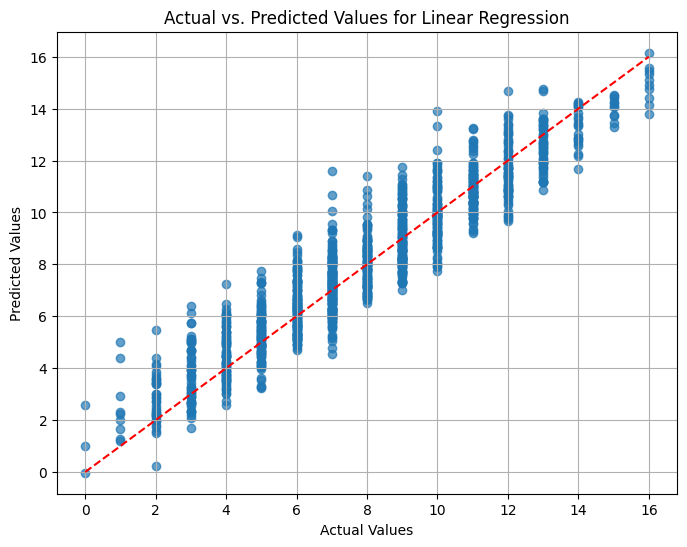

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.grid(True)
plt.show()

In [ ]:
import joblib

for model_name, config in models.items():
    print(f"Training and exporting {model_name}")
    model = config["model"]
    model.fit(x, y)
    joblib.dump(model, f"{model_name.lower()}_model.joblib")

Training and exporting LinearRegression
Training and exporting DecisionTree
Training and exporting RandomForest
Training and exporting SVR
